# Logistic Regression
## With intro to Pandas and Graphing
## Part 2


Reacall:

Steps we have Done:
* Collect the data
* Clean the data by:
* _ removing unnecsessary features
* _ Filling in any missing values
* _ Filtering for bad / out of range outliers and correcting or removing them
* _ Mapping the features so that increasing the feature linearly increases or decreases the likelihood of a positive result. Add a square term feature is a simple approach, but not a linear one.  Ng doesn't mention this in Coursera.  
* _ Making numbers out of any text or discrete values, possibly with *one hot* approach
* _ Check the data for cross-correlation - are any of the features too dependent on one another?  If so, remove a feature.
* Normalize the data (skipped)

Steps still to do:

* Separate the data into at least two data sets:  training, and test.  
* _ the test set is used to measure the progress of the learning algorithm, to measure overfitting (variance - model is too complex and its plotted surface wobbles a lot to overfit the data) and underfitting (bias - model is too simple).  
* _ If you have parameters to tune, such as the learning rate or regularization parameters, you'll need to also generate a *validation* set to use to tune those parameters before applying the test set.
* Train the model
* Apply the model
* Analyze the results!



# Modules
Some of these modules we may not have covered yet.  We'll talk about and try them all.  They're all part of `Anaconda`.

It's typical to first import all you'll need.

```python
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# set some basic styles
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
```

In the above, you're familiar with pandas and numpy for sure.  
* sklearn is the scikit-learn package. A huge machine learning library of routines.  We do not want to import all of sklearn.  It's too big.
* seaborn and matplotlib are graphing packages.  Plotly is another common one.

This is kind of *boilerplate* but get used to that - copy and paste it into the next cell.


In [25]:
# Setup

### 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# set some basic styles
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


Load the data from the pickle.

In [26]:
bankdata = pd.read_pickle('banking_data_ready.pkl')


# Split the data into training and test sets

The iloc method on a df takes it and slices it by column and row **Numbers** - not names, which is useful if you want to carve out for example the first column.

Then we can split our data using the train_test_split function from scikit.  This by default gives us an 80 / 20 split between training and test data.

The random state can be used to make this deterministic - so that we get the same result every time we run our JN.



In [27]:
X = bankdata.iloc[:,1:]
y = bankdata.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Check out the shapes of the training data(X) and test result(y).


In [29]:
print( X_train.shape, y_test.shape)


(30891, 31) (10297,)



Great! Now we can start building our logistic regression model.


# Logistic Regression Model

Fit logistic regression to the training set.  There are a lot of different solvers that the system can use.  the random_state is used to initialize the theta weights to random values.

The built model is stored in a "classifier" object, which can then be used to test and run predictions!


In [66]:
classifier = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the test set results and creating confusion matrix

What we're going to do is run the X_test set through the prediction routine, to get predictions for each of those cases.

How often are we right?  How often are we wrong?

There are four cases:
* we predicted a sale, and got a sale (a true positive)
* we predicted a sale, but there really was no sale (a false positive)
* we predicted no sale, and there was no sale (a true negative)
* we predicted no sale, but there was a sale. (a false negative).

The `confusion_matrix()` function will calculate all of those for us.  But it doesn't really label them at all.  This data is binary.  The indices are 0,1, so the top right corner are the true negatives, and the bottom left corner are the true positives.

You can see by the confusion matrix that the false positives are pretty high!  We predict there will be a sale most of the time, when there's not.



In [65]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_result  = confusion_matrix(y_test, y_pred)
print(confusion_result)

# Print out whhere they don't match... you can see that this sums to the diagonal.
print((y_test != y_pred).sum())



[[9060   96]
 [ 929  212]]
1025


# Accuracy

The accuracy of our model is a rough indication of how good it is.

* How often can we get a correct result? (The overall accuracy)
* If we predict a success, what's the likelihood we are right?  This is the precision.  It's the ratio of being actually right (true positives) / the total we are actually right (true positives) with when we are incorrectly right (false positives).

If the precision is 1, when we say it's positive, it really is positive!

But the precision of our model we can compute:

` our_precision = 212 / (212 + 929) `

In [62]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
print(f"Our precision sucks: {212 / (212 + 929):0.2f}")

Accuracy of logistic regression classifier on test set: 0.90
Our precision sucks: 0.19


# Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.



In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      9989
           1       0.19      0.69      0.29       308

    accuracy                           0.90     10297
   macro avg       0.59      0.80      0.62     10297
weighted avg       0.97      0.90      0.93     10297



Interpretation: Because most people don't buy contracts, it's no surprise that the precision is so low.  But it does help *some*.  What this tells you is which prospects might be worth a little more effort to get them to buy since they might be more likely to buy based on the prediction.  You wouldn't want to spend as much time on a prospect not as liekly to buy. 

But the model isn't so accurate that you'd avoid calling them... You'd call them anyway.  Because you'd miss 4/5 of your sales if you didn't.



# Making a prediction

In our bankdata we have these columns:

'single', 'summer', 'previous', 
'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 
'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school',
'education_illiterate', 'education_professional.course',
'education_university.degree', 'education_unknown', 
'default_no', 'default_unknown', 'default_yes', 
'contact_cellular', 'contact_telephone', 
'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

And that's a lot of values to build, but we can do it.

If we have a single person, interviewed in the summer, with no previous calls, who works in adin, that is 4 years of education, never defaulted on a loan, contacted via cell, with no previous outcome....

It looks like this:
```
 [1, 1, 0, 
  1, 0, 0, 0, 0,
  0, 0, 0, 0, 0,
  0, 0,
  1, 0, 0, 0,
  0, 0,
  0, 0,
  1, 0, 0,
  1, 0, 
  0, 1, 0 ]
```

We can run a prediction...  

By passing that customer through the predict_proba function you can see the estimated probabilities of each result.

Note that you have to pass it a set of inputs - not just one input. A list of lists, if you will.

 

       

In [79]:
somecustomer =  [1, 1, 0, 
  1, 0, 0, 0, 0,
  0, 0, 0, 0, 0,
  0, 0,
  1, 0, 0, 0,
  0, 0,
  0, 0,
  1, 0, 0,
  1, 0, 
  0, 1, 0 ]

# do they have the same number of features?
print(len(somecustomer), len(X_train.columns), "Checking that number of values match")

print("Probability of failure / success is: ", classifier.predict_proba([somecustomer]))
print("This customer will likely ", 
    ('not' if 0 == classifier.predict([somecustomer]) else ''), " buy.")

31 31 Checking that number of values match
Probability of failure / success is:  [[0.87803932 0.12196068]]
This customer will likely  not  buy.


# Advanced

The ROC curve is a useful way to display how good a model is.  It works by slowly shifting the threshold where we would choose "yes" by the probability result above... from probablilty 0.0 up to 1.0.  And it computes the ratio between the false positive rate and the true positive rate for all those values.  If you set the threshhold at 0, you'll DEFINTELY get a ton of false positives!  

You can't see the threshhold values in there.  But the curve allows you to intelligently trade off precision for recall when the consequences of a false positive may outweigh the consequences of a false negative.  E.G. whether or not there is a swarm of aircraft about to bomb you (read about the history of these curves).

Read about what they mean, and how to use them.

What does this ROC curve say about the model?



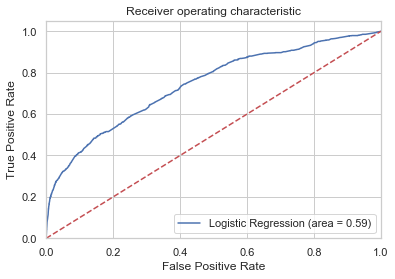

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()